In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
dataset = fetch_openml(name='Boston-house-price-data', version=1)

In [3]:
import pandas as pd
data = dataset.data
target = dataset.target
feature_names = dataset.feature_names
df = pd.DataFrame(data, columns=feature_names)
num_features = df.shape[1]
print(num_features)
median_target = target.median()
print(median_target)
above_median_count = len([t for t in target if t > median_target])
print(above_median_count)
df['above_median'] = (target > median_target).astype(int)
print(df)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('above_median', axis=1), df['above_median'], test_size=0.3, random_state=0)

13
21.2
250
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  above_median  
0       15.3  396.90   4.98             1  

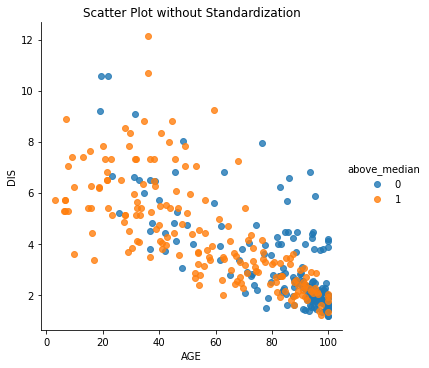

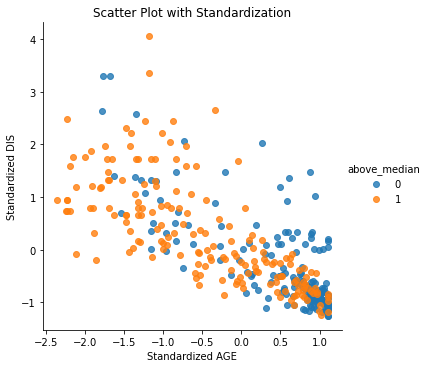

In [4]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler

sns.lmplot(x='AGE', y='DIS', hue='above_median', data=pd.concat([X_train, y_train], axis=1), fit_reg=False)
plt.title("Scatter Plot without Standardization")
plt.show()


features = ['AGE', 'DIS']
X_train_subset = X_train[features]
y_train_subset = y_train
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train_subset)

standardized_df = pd.DataFrame(X_train_standardized, columns=features)
standardized_df['above_median'] = y_train_subset.reset_index(drop=True)


sns.lmplot(x='AGE', y='DIS', hue='above_median', data=standardized_df, fit_reg=False)
plt.title("Scatter Plot with Standardization")
plt.xlabel("Standardized AGE")
plt.ylabel("Standardized DIS")
plt.show()

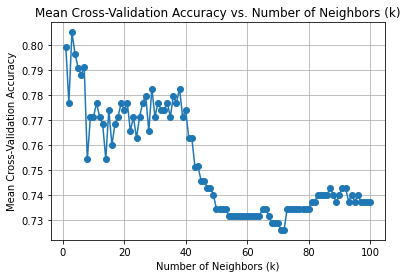

3
0.8051509054325955


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
k_values = list(range(1, 101))
mean_test_scores = []
mean_train_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, X_train, y_train, cv=5, return_train_score=True)
    mean_test_score = scores['test_score'].mean()
    mean_train_score = scores['train_score'].mean()
    mean_test_scores.append(mean_test_score)
    mean_train_scores.append(mean_train_score)

plt.plot(k_values, mean_test_scores, marker='o')
plt.title("Mean Cross-Validation Accuracy vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.grid(True)
plt.show()

best_k = k_values[mean_test_scores.index(max(mean_test_scores))]
highest_accuracy = max(mean_test_scores)

print(best_k)
print(highest_accuracy)
# The best 'k' is 3, and the highest cross-validation accuracy is 0.8051509054325955

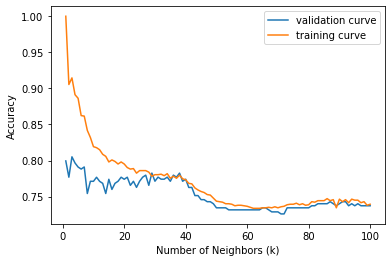

In [6]:
plt.plot(k_values, mean_test_scores, label='validation curve')
plt.plot(k_values, mean_train_scores, label='training curve')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.legend()
# I compare the validation curve and training curve , the range of k from 0 to 20 lead to the underfitting

the number of features left: 13
[0.02606133 0.         0.01079898 0.         0.01291405 0.1117405
 0.0695664  0.07963761 0.0056499  0.02478224 0.04407122 0.02442011
 0.59035767]
1
ZN
the number of features left: 12
[2.60613259e-02 1.00000000e+02 1.07989763e-02 0.00000000e+00
 1.29140522e-02 1.11740497e-01 6.95664018e-02 7.96376066e-02
 5.64989785e-03 2.47822394e-02 4.40712188e-02 2.44201141e-02
 5.90357670e-01]
3
CHAS
the number of features left: 11
[2.60613259e-02 1.00000000e+02 1.07989763e-02 1.00000000e+02
 1.29140522e-02 1.11740497e-01 6.95664018e-02 7.96376066e-02
 5.64989785e-03 2.47822394e-02 4.40712188e-02 2.44201141e-02
 5.90357670e-01]
8
RAD
the number of features left: 10
[2.60613259e-02 1.00000000e+02 1.07989763e-02 1.00000000e+02
 1.29140522e-02 1.11740497e-01 6.95664018e-02 7.96376066e-02
 1.00000000e+02 2.47822394e-02 4.40712188e-02 2.44201141e-02
 5.90357670e-01]
2
INDUS
the number of features left: 9
[2.60613259e-02 1.00000000e+02 1.00000000e+02 1.00000000e+02
 1.29140

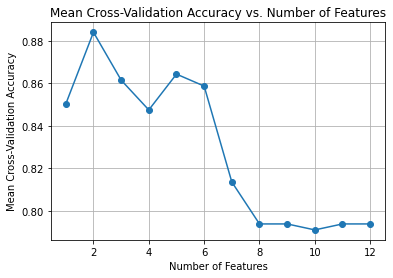

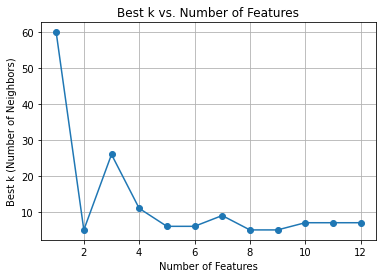

The number of essential features for classification is 13.


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

def Feature_selector(X_train, y_train, tr=0.95):
    removed_features = []
    cv_scores = []
    k_values = []

    knn_full_features = KNeighborsClassifier(n_neighbors=5)
    cv_scores_full_features = cross_val_score(knn_full_features, X_train, y_train, cv=5)
    initial_accuracy = np.mean(cv_scores_full_features)

    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    feature_importance = dt.feature_importances_
    df_p3 = pd.DataFrame(data=X_train, columns=dataset.feature_names)

    #print(df_p3)

    while df_p3.shape[1] > 1:

        print("the number of features left:", df_p3.shape[1])


        least_important_feature = np.argmin(feature_importance)
        print(feature_importance)
        print(least_important_feature)
        print(dataset.feature_names[least_important_feature])
        feature_importance[least_important_feature] = 100
        df_p3.pop(str(dataset.feature_names[least_important_feature]))
        removed_features.append(dataset.feature_names[least_important_feature])

        best_k = None
        best_score = 0

        for k in range(1, 101):
            knn = KNeighborsClassifier(n_neighbors=k)
            #print(df_p3)
            #print(y_train)
            cv_scores_k = cross_val_score(knn, df_p3, y_train, cv=5)
            mean_cv_score_k = np.mean(cv_scores_k)

            if mean_cv_score_k > best_score:
                best_score = mean_cv_score_k
                best_k = k

        cv_scores.append(best_score)
        k_values.append(best_k)

        if (cv_scores[-1] < tr * initial_accuracy and len(removed_features) >= 2):
            break

    return removed_features, cv_scores, k_values
removed_features, cv_scores, k_values = Feature_selector(X_train, y_train,tr=0.95)

num_features = list(range(1, len(removed_features) + 1))
plt.plot(num_features, cv_scores[::-1], marker='o')
plt.title("Mean Cross-Validation Accuracy vs. Number of Features")
plt.xlabel("Number of Features")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.grid(True)
plt.show()


plt.plot(num_features, k_values[::-1], marker='o')
plt.title("Best k vs. Number of Features")
plt.xlabel("Number of Features")
plt.ylabel("Best k (Number of Neighbors)")
plt.grid(True)
plt.show()

num_essential_features = X_train.shape[1]
print(f"The number of essential features for classification is {num_essential_features}.")

the number of features left: 13
[0.03633387 0.         0.02435873 0.         0.01291405 0.08693965
 0.0695664  0.08060616 0.         0.02478224 0.04407122 0.02442011
 0.59600757]
1
ZN
the number of features left: 12
[3.63338674e-02 1.00000000e+02 2.43587311e-02 0.00000000e+00
 1.29140522e-02 8.69396464e-02 6.95664018e-02 8.06061606e-02
 0.00000000e+00 2.47822394e-02 4.40712188e-02 2.44201141e-02
 5.96007568e-01]
3
CHAS
the number of features left: 11
[3.63338674e-02 1.00000000e+02 2.43587311e-02 1.00000000e+02
 1.29140522e-02 8.69396464e-02 6.95664018e-02 8.06061606e-02
 0.00000000e+00 2.47822394e-02 4.40712188e-02 2.44201141e-02
 5.96007568e-01]
8
RAD
the number of features left: 10
[3.63338674e-02 1.00000000e+02 2.43587311e-02 1.00000000e+02
 1.29140522e-02 8.69396464e-02 6.95664018e-02 8.06061606e-02
 1.00000000e+02 2.47822394e-02 4.40712188e-02 2.44201141e-02
 5.96007568e-01]
4
NOX
the number of features left: 9
[3.63338674e-02 1.00000000e+02 2.43587311e-02 1.00000000e+02
 1.000000

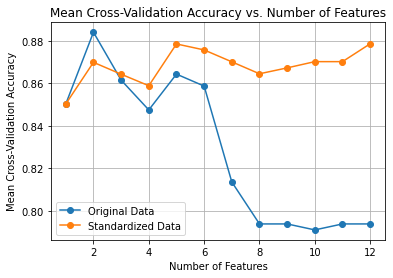

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)

cv_scores_standardized = Feature_selector(X_train_standardized, y_train, tr=0.95)[1]

plt.plot(num_features, cv_scores[::-1], marker='o', label='Original Data')
plt.plot(num_features, cv_scores_standardized[::-1], marker='o', label='Standardized Data')
plt.title("Mean Cross-Validation Accuracy vs. Number of Features")
plt.xlabel("Number of Features")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.grid(True)
plt.legend()

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


tree_mean_cv_scores = []


max_depth_range = range(1, 60)
min_samples_split_range = range(2, 30)

for max_depth in max_depth_range:
    for min_samples_split in min_samples_split_range:
        tree_classifier = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=0)
        cv_scores = cross_val_score(tree_classifier, X_train_standardized, y_train, cv=5)
        mean_cv_score = np.mean(cv_scores)
        tree_mean_cv_scores.append(mean_cv_score)


best_decisiontree_score = max(tree_mean_cv_scores)


knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_cv_scores = cross_val_score(knn_classifier, X_train_standardized, y_train, cv=5)
best_knn_score = np.mean(knn_cv_scores)
print(best_decisiontree_score)
print(best_knn_score)

0.8756539235412475
0.864507042253521


In [10]:
from sklearn.metrics import accuracy_score
X_test_standardized = scaler.fit_transform(X_test)

df_x_test = pd.DataFrame(data=X_test_standardized, columns=dataset.feature_names)

df_x_test.pop('CRIM')
df_x_test.pop('ZN')
df_x_test.pop('INDUS')
df_x_test.pop('CHAS')
df_x_test.pop('NOX')
df_x_test.pop('AGE')
df_x_test.pop('DIS')
df_x_test.pop('RAD')
df_x_test.pop('TAX')
df_x_test.pop('PTRATIO')
df_x_test.pop('B')

knn_two_features = KNeighborsClassifier(n_neighbors=5)
knn_two_features_scores = cross_val_score(knn_two_features, df_x_test, y_test, cv=5)
final_score = np.mean(knn_two_features_scores)
print(final_score)

0.8101075268817205
